# Data Exploration

## Import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

## Load and save data
Save files as DataFrame and look at their firsts lines

In [2]:
features_file = 'data/features.csv'
features_df = pd.read_csv(features_file)
features_df.head(5)

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,2010-02-12,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,2010-02-19,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,2010-02-26,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,2010-03-05,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False


In [3]:
stores_file = 'data/stores.csv'
stores_df = pd.read_csv(stores_file)
stores_df.head(5)

,Store,Type,Size
0,1,A,151315
1,2,A,202307
2,3,B,37392
3,4,A,205863
4,5,B,34875


In [4]:
train_file = 'data/train.csv'
train_df = pd.read_csv(train_file)
train_df.head(5)

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-02-05,24924.50,False
1,1,1,2010-02-12,46039.49,True
2,1,1,2010-02-19,41595.55,False
3,1,1,2010-02-26,19403.54,False
4,1,1,2010-03-05,21827.90,False


## Merge train, stores and features DataFrames

In [5]:
data_df = train_df.merge(stores_df, how='left').merge(features_df, how='left')
data_df.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
0,1,1,2010-02-05,24924.50,False,A,151315,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106
1,1,1,2010-02-12,46039.49,True,A,151315,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106
2,1,1,2010-02-19,41595.55,False,A,151315,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106
3,1,1,2010-02-26,19403.54,False,A,151315,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106
4,1,1,2010-03-05,21827.90,False,A,151315,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106


In [6]:
# Compute the percentage of missing values for the 5 Markdown features
MarkDown = ['MarkDown1','MarkDown2','MarkDown3','MarkDown4','MarkDown5']
for md in MarkDown:
    part = round(data_df[str(md)].isnull().sum(axis = 0) / len(data_df) * 100, 2)
    print('Percentage of missing values for {} =  {}'.format(str(md),str(part)))

Percentage of missing values for MarkDown1 =  64.26
Percentage of missing values for MarkDown2 =  73.61
Percentage of missing values for MarkDown3 =  67.48
Percentage of missing values for MarkDown4 =  67.98
Percentage of missing values for MarkDown5 =  64.08


# Exploratoty Visualization

## Correlation Heatmap of data_df features

Text(0.5, 1, 'Features correlation heatmap')

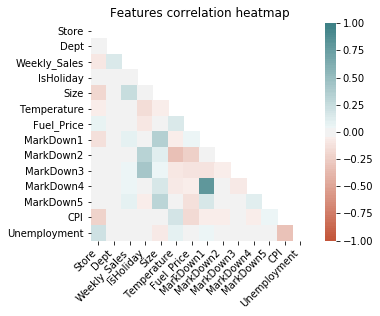

In [14]:
# Website used to make the correlation heatmap
# https://towardsdatascience.com/better-heatmaps-and-correlation-matrix-plots-in-python-41445d0f2bec
# https://medium.com/@chrisshaw982/seaborn-correlation-heatmaps-customized-10246f4f7f4b

corr = data_df.corr()
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

ax = sns.heatmap(
        corr,
        vmin=-1, vmax=1, center=0,
        cmap=sns.diverging_palette(20, 200, n=100),
        square=True,
        mask = mask)

ax.set_xticklabels(
        ax.get_xticklabels(),
        rotation=45,
        horizontalalignment='right');
ax.set_title('Features correlation heatmap')

Features seem poorly correlated in general except from MarkDown1 with MarkDown4.  
Look more closely at Weekly_Sales correlation

Text(0.5, 1, 'Features correlation heatmap with Weekly_Sales')

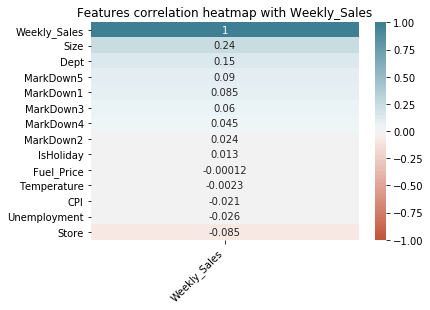

In [15]:
corr = data_df.corr()
ax = sns.heatmap(
        corr[['Weekly_Sales']].sort_values(by=['Weekly_Sales'],ascending=False),
        vmin=-1, vmax=1, center=0,
        cmap=sns.diverging_palette(20, 220, n=200),
        square=False,
        annot=True)

ax.set_xticklabels(
        ax.get_xticklabels(),
        rotation=45,
        horizontalalignment='right');
ax.set_title('Features correlation heatmap with Weekly_Sales')

Weekly_Sales are the most correlated with the store's size and departments.  
On the other hand, Weekly_Sales are the less correlated with store's number.  
We will look at the sales repartition on these 3 features

In [23]:
# define function for simple scatter plots
# https://jakevdp.github.io/PythonDataScienceHandbook/04.02-simple-scatter-plots.html
def scatterplot(data_df, feature, feature2):
    plt.figure()
    plt.scatter(data_df[feature] , data_df[feature2])
    plt.title(label=feature2 + ' by '+ feature)
    plt.xlabel(feature)
    plt.ylabel(feature2)

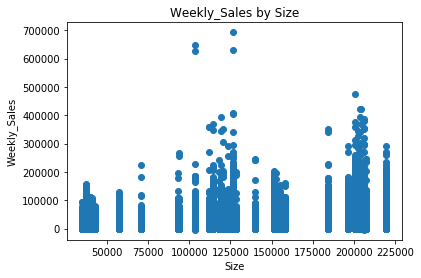

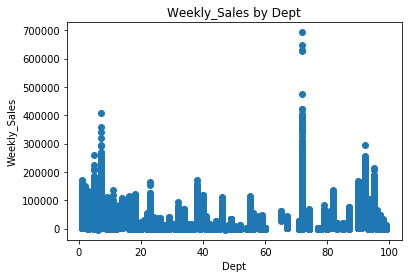

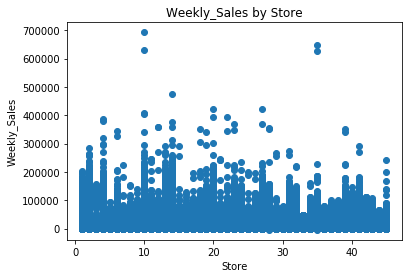

In [24]:
# Scatter Plot of this 3 features
scatterplot(data_df, 'Size', 'Weekly_Sales')
scatterplot(data_df, 'Dept', 'Weekly_Sales')
scatterplot(data_df, 'Store', 'Weekly_Sales')

There are outliers, but we see that in general the larger the store is, the more sales there are.  
Sales are very uneven between different departments with some of them with no sales at all.  
As expected, the store's number shows no correlation with weekly sales.

# Sales evolution

In [27]:
# Convert Date column to Date format
# https://stackoverflow.com/questions/9627686/plotting-dates-on-the-x-axis-with-pythons-matplotlib
data_df['DateType'] = [datetime.strptime(date, '%Y-%m-%d').date() for date in data_df['Date'].astype(str).values.tolist()]
data_df.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,DateType
0,1,1,2010-02-05,24924.50,False,A,151315,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,2010-02-05
1,1,1,2010-02-12,46039.49,True,A,151315,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,2010-02-12
2,1,1,2010-02-19,41595.55,False,A,151315,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,2010-02-19
3,1,1,2010-02-26,19403.54,False,A,151315,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,2010-02-26
4,1,1,2010-03-05,21827.90,False,A,151315,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,2010-03-05


In [31]:
# Group together sales evolution by Type, and all together in a new dataframe
total_sales_evolution = data_df.loc[:, ['DateType', 'Weekly_Sales']].groupby('DateType').sum()
total_sales_evolution['A'] = data_df.loc[data_df.Type == 'A', ['DateType', 'Weekly_Sales']].groupby('DateType').sum()
total_sales_evolution['B'] = data_df.loc[data_df.Type == 'B', ['DateType', 'Weekly_Sales']].groupby('DateType').sum()
total_sales_evolution['C'] = data_df.loc[data_df.Type == 'C', ['DateType', 'Weekly_Sales']].groupby('DateType').sum()

print(total_sales_evolution.head())

            Weekly_Sales            A            B           C
DateType                                                      
2010-02-05   49750740.50  32144126.25  14775498.62  2831115.63
2010-02-12   48336677.63  30982570.79  14439178.59  2914928.25
2010-02-19   48276993.78  31000072.76  14540038.62  2736882.40
2010-02-26   43968571.13  28008995.99  13256113.44  2703461.70
2010-03-05   46871470.30  30020543.60  13988650.32  2862276.38


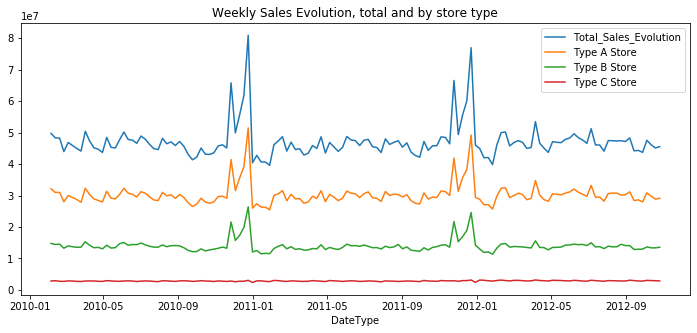

In [32]:
# display the data 
plt.figure(figsize=(12,5))
total_sales_evolution['Weekly_Sales'].plot(label='Total_Sales_Evolution') 
total_sales_evolution['A'].plot(label='Type A Store') 
total_sales_evolution['B'].plot(label='Type B Store')
total_sales_evolution['C'].plot(label='Type C Store')
plt.title(label='Weekly Sales Evolution, total and by store type')
plt.legend()
plt.show()

Total sales seems clearly to follow a yearly pattern  
Type C stores represent a really small part of global sales  
We will look more closely at the size of these stores

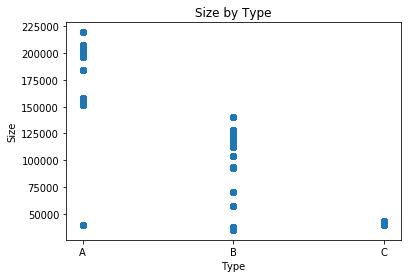

In [33]:
# Scatter plot size of stores by type
scatterplot(data_df, 'Type', 'Size')

In [36]:
# compute how many C Stores there are
print(data_df.Store[data_df.Type == 'C'].nunique())

6


There are only 6 ‘Type C’ stores, which are among the smallest